___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf


In [2]:
plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [3]:
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [6]:
x_train[99].shape

(28, 28)

In [7]:
x_train[99]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,  57,
         78,  87,  47,  25,   4,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  12, 154, 123,
         33,  57,  48,  82, 118,  56,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  94, 125,   0,
          0,   0,   0,   0,  86, 203,  39,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  

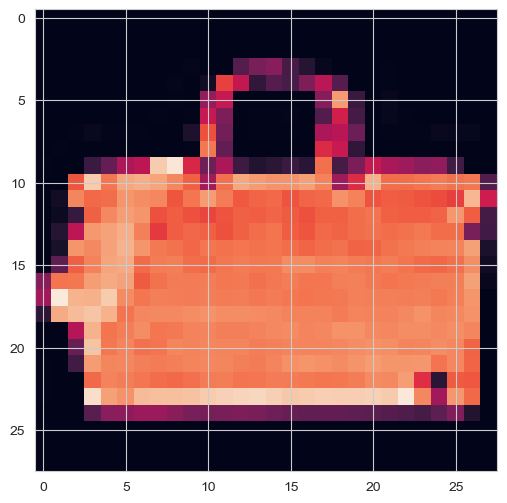

In [8]:
plt.imshow(x_train[99])
plt.show()

In [9]:
y_train[99]

8

In [10]:
y_train.shape

(60000,)

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [13]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
y_train[0]

9

In [15]:
classes[int(y_train[0])]

'Ankle boot'

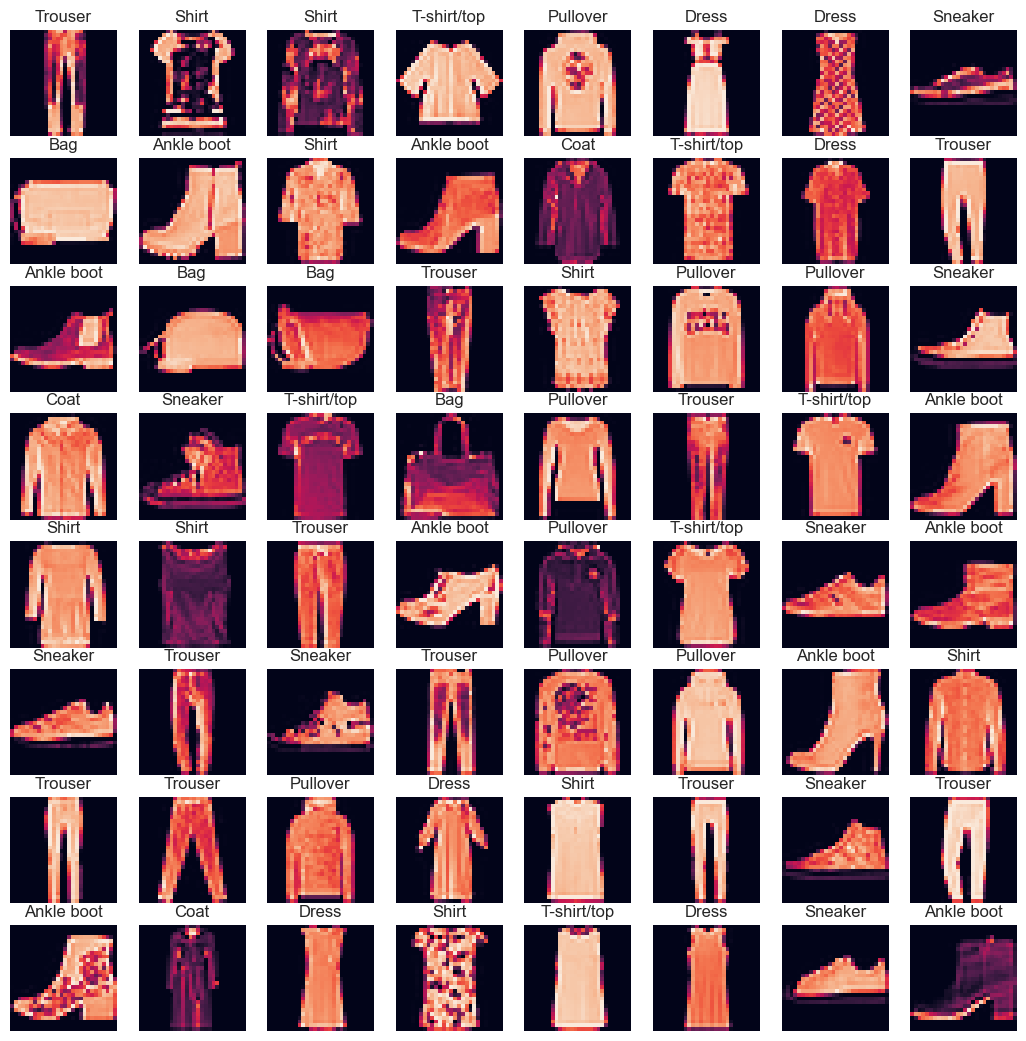

In [16]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(x_train[rand_index])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
x_train[99].min()

0

In [18]:
x_train[99].max()

255

In [19]:
X_train = x_train.astype("float32")
X_test = x_test.astype("float32")
X_train /= 255
X_test /= 255

In [20]:
X_train[99].min()

0.0

In [21]:
X_train[99].max()

1.0

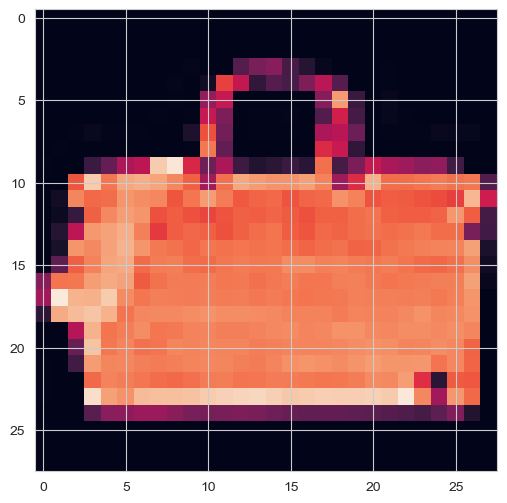

In [22]:
plt.imshow(X_train[99])
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
np.expand_dims(x_train, 3).shape

(60000, 28, 28, 1)

In [25]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [26]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [27]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [30]:
y_train[99]

8

In [31]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [32]:
from numpy.random import seed
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, random_state=SEED, shuffle=True)

In [33]:
print("X_train shape -> ", X_train.shape)
print("y_train shape -> ", Y_train.shape)
print("X_valid shape -> ", X_valid.shape)
print("y_valid shape -> ", Y_valid.shape)

X_train shape ->  (48000, 28, 28, 1)
y_train shape ->  (48000, 10)
X_valid shape ->  (12000, 28, 28, 1)
y_valid shape ->  (12000, 10)


# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [71]:
print(28 * (3 * 3 * 1 + 1))

280


In [72]:
model = Sequential()

In [73]:
model.add(
    Conv2D(
        filters=28,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(28, 28, 1),
        activation="relu",
        padding="same",
    )
)
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Conv2D(filters=44, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=60, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 27, 27, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 44)        11132     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 44)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 60)        23820     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 6, 6, 60)         

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
early_stop = EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)

In [80]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_valid, Y_valid),
    callbacks=[early_stop],
)

Epoch 1/20
1500/1500 [==============================] - 108s 72ms/step - loss: 0.2670 - accuracy: 0.9031 - val_loss: 0.2450 - val_accuracy: 0.9076
Epoch 2/20
1500/1500 [==============================] - 151s 101ms/step - loss: 0.2311 - accuracy: 0.9168 - val_loss: 0.2611 - val_accuracy: 0.9046
Epoch 3/20
1500/1500 [==============================] - 172s 114ms/step - loss: 0.2084 - accuracy: 0.9236 - val_loss: 0.2485 - val_accuracy: 0.9106
Epoch 4/20
1500/1500 [==============================] - 126s 84ms/step - loss: 0.1893 - accuracy: 0.9305 - val_loss: 0.2381 - val_accuracy: 0.9183
Epoch 5/20
1500/1500 [==============================] - 152s 101ms/step - loss: 0.1770 - accuracy: 0.9363 - val_loss: 0.2631 - val_accuracy: 0.9201
Epoch 6/20
1500/1500 [==============================] - 198s 132ms/step - loss: 0.1683 - accuracy: 0.9405 - val_loss: 0.2306 - val_accuracy: 0.9231
Epoch 7/20
1500/1500 [==============================] - 167s 112ms/step - loss: 0.1595 - accuracy: 0.9440 - val_lo

**TASK 7: Plot values of metrics you used in your model.**

In [81]:
model.metrics_names

['loss', 'accuracy']

In [84]:
summary = pd.DataFrame(model.history.history)
summary.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.267,0.903,0.245,0.908
1,0.231,0.917,0.261,0.905
2,0.208,0.924,0.249,0.911
3,0.189,0.930,0.238,0.918
4,0.177,0.936,0.263,0.920
5,0.168,0.940,0.231,0.923
6,0.160,0.944,0.239,0.919
7,0.154,0.946,0.312,0.912
8,0.149,0.948,0.317,0.914
9,0.148,0.950,0.282,0.911


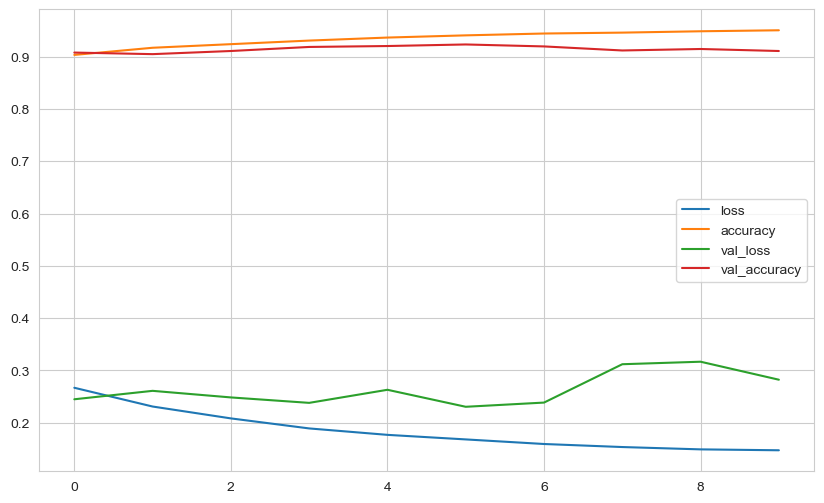

In [85]:
summary.plot();

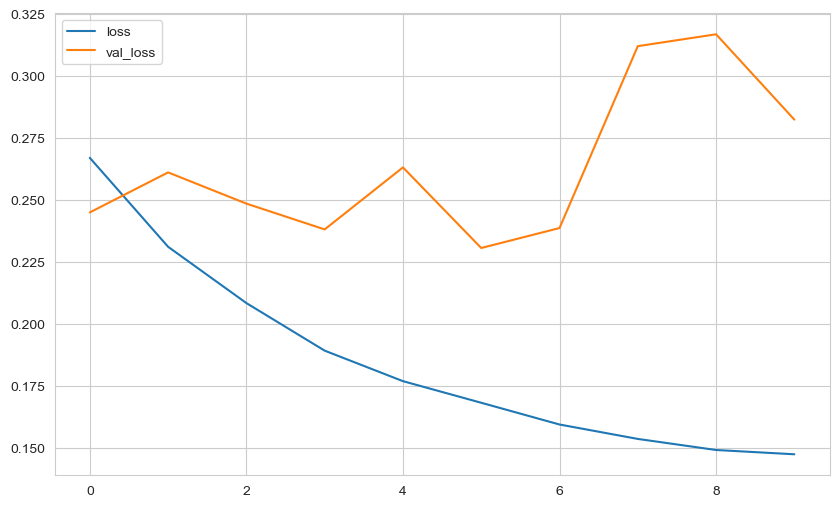

In [86]:
summary[["loss", "val_loss"]].plot()
plt.show()

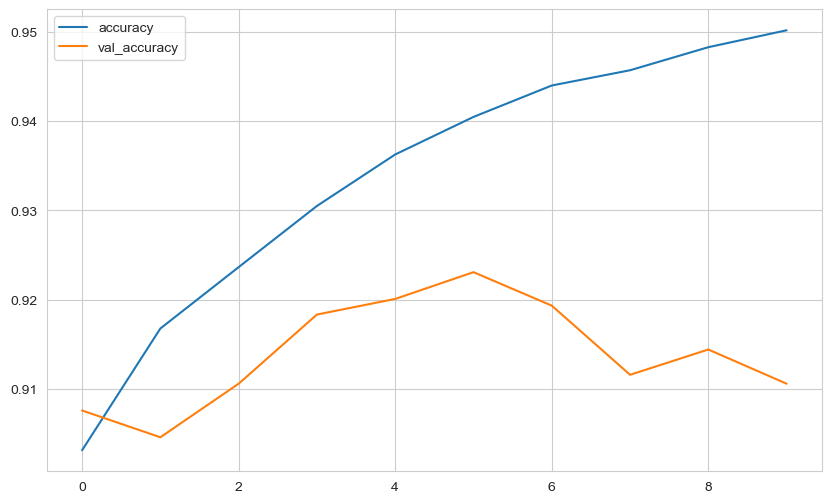

In [87]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [88]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [89]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.2543 - accuracy: 0.9158


[0.25425592064857483, 0.9157999753952026]

In [90]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.25425592064857483
Test accuracy: 0.9157999753952026


In [91]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 6s 18ms/step


array([[7.30560924e-12, 6.95866379e-13, 7.54121700e-14, ...,
        6.24149777e-07, 1.54015895e-12, 9.99999285e-01],
       [3.57303594e-04, 1.05759271e-12, 9.99616385e-01, ...,
        2.97241363e-11, 9.73285563e-10, 1.47169082e-10],
       [4.02204364e-07, 9.99999523e-01, 2.39475662e-10, ...,
        1.41137532e-10, 8.19979362e-10, 5.90419198e-08],
       ...,
       [4.86681097e-16, 2.43424892e-20, 6.20489949e-17, ...,
        1.45933612e-14, 1.00000000e+00, 5.61604020e-17],
       [4.98655801e-08, 9.99999523e-01, 2.98363334e-10, ...,
        4.69065620e-10, 1.59490213e-10, 6.77408130e-09],
       [1.25095285e-05, 1.23874679e-06, 3.37047254e-06, ...,
        3.08279996e-03, 3.70166963e-04, 2.52917598e-05]], dtype=float32)

In [92]:
pred_prob.shape

(10000, 10)

In [93]:
pred_prob[9]

array([1.7340832e-09, 1.7197861e-11, 2.6333764e-12, 1.7600459e-11,
       4.2740169e-12, 1.4340537e-07, 2.6201909e-11, 9.9999976e-01,
       3.5700704e-10, 1.6809557e-07], dtype=float32)

In [94]:
np.argmax(pred_prob[9])

7

In [95]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [96]:
y_pred.shape

(10000,)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.84      0.89      0.87      1000
           3       0.91      0.93      0.92      1000
           4       0.87      0.85      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.79      0.70      0.74      1000
           7       0.96      0.97      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [98]:
print(confusion_matrix(y_test, y_pred))

[[910   0  18   9   1   0  58   0   4   0]
 [  2 976   0  17   2   0   1   0   2   0]
 [ 18   0 893   9  37   0  43   0   0   0]
 [ 18   0  14 933  18   0  17   0   0   0]
 [  0   0  59  28 853   0  60   0   0   0]
 [  0   0   0   0   0 973   0  16   0  11]
 [134   0  74  25  61   0 698   0   8   0]
 [  0   0   0   0   0   2   0 973   0  25]
 [  5   0   3   4   3   1   3   5 976   0]
 [  0   0   0   0   0   3   0  24   0 973]]


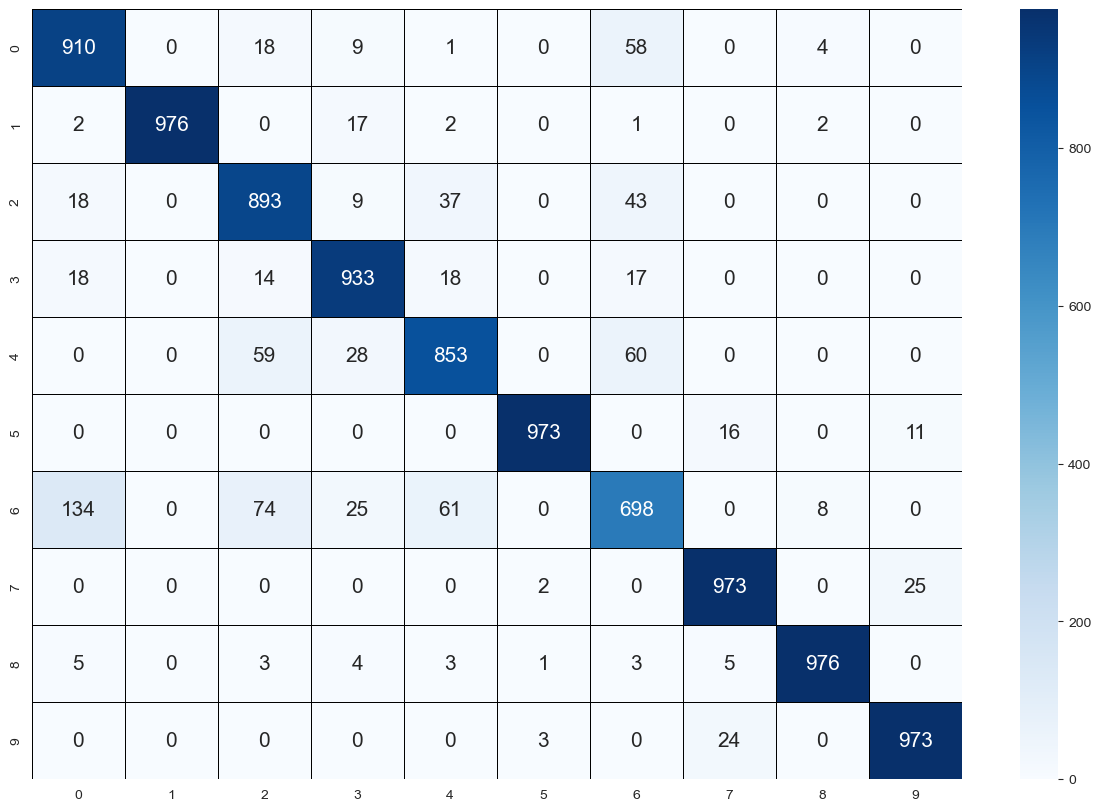

In [99]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [100]:
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [101]:
np.not_equal(y_test, y_pred).sum()

842

In [102]:
np.equal(y_test, y_pred).sum()

9158

## Prediction

In [103]:
my_number = X_test[537]

In [104]:
my_number.shape

(28, 28, 1)

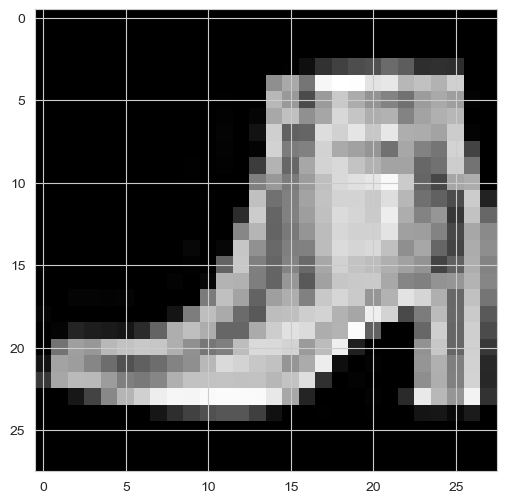

In [105]:
plt.imshow(my_number, cmap="gray")
plt.show()

In [106]:
np.expand_dims(my_number, 0).shape

(1, 28, 28, 1)

In [107]:
pred_prob = model.predict(np.expand_dims(my_number, 0))
pred_prob

1/1 [==============================] - 0s 52ms/step


array([[9.1005280e-11, 3.8259240e-13, 3.3847740e-13, 4.6454333e-12,
        2.1615637e-12, 4.6999129e-09, 7.0419837e-10, 1.6524285e-06,
        4.3722980e-11, 9.9999833e-01]], dtype=float32)

In [108]:
y_pred = np.argmax(pred_prob)
y_pred

9

In [109]:
model.save("cnn-1.h5")

D:\downloads\Anaconda\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___